<a href="https://colab.research.google.com/github/FIOWB21/Machine-learning/blob/main/%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = fetch_california_housing()
X, y = data.data, data.target
df = pd.DataFrame(data=X, columns=data.feature_names)
df['target'] = y


print("Перші рядки даних:")
df.head()

Перші рядки даних:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Перевірка на пропущені значення
print("\nПеревірка на пропущені значення:")
print(df.isnull().sum())

# Перевірка наявності дублікатів
print("\nПеревірка наявності дублікатів:")
print(df.duplicated().sum())

# Виведення розміру таблиці
print("\nРозмір таблиці:")
print(df.shape)

print(df.dtypes)




Перевірка на пропущені значення:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

Перевірка наявності дублікатів:
0

Розмір таблиці:
(20640, 9)
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
target        float64
dtype: object


In [5]:
# 2. Масштабування ознак
X = df.drop('target', axis=1)
y = df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Розділення на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
# Налаштування моделей та підбір параметрів
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest Regressor': RandomForestRegressor()
}

# Параметри для GridSearchCV
param_grids = {
    'Ridge Regression': {
        'alpha': [0.1, 1, 10]
    },
    'Random Forest Regressor': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20]
    }
}

best_models = {}

# Тренування та налаштування моделей
for name, model in models.items():
    print(f"\nНалаштування параметрів для {name}...")
    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
        print(f"Найкращі параметри для {name}: {grid_search.best_params_}")
    else:
        best_models[name] = model.fit(X_train, y_train)
        print(f"{name} не потребує налаштування параметрів.")

# Оцінка моделей
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\nОцінка {name}:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")


Налаштування параметрів для Linear Regression...
Linear Regression не потребує налаштування параметрів.

Налаштування параметрів для Ridge Regression...
Найкращі параметри для Ridge Regression: {'alpha': 0.1}

Налаштування параметрів для Random Forest Regressor...
Найкращі параметри для Random Forest Regressor: {'max_depth': 20, 'n_estimators': 200}

Оцінка Linear Regression:
Mean Squared Error: 0.56
R^2 Score: 0.58

Оцінка Ridge Regression:
Mean Squared Error: 0.56
R^2 Score: 0.58

Оцінка Random Forest Regressor:
Mean Squared Error: 0.25
R^2 Score: 0.81


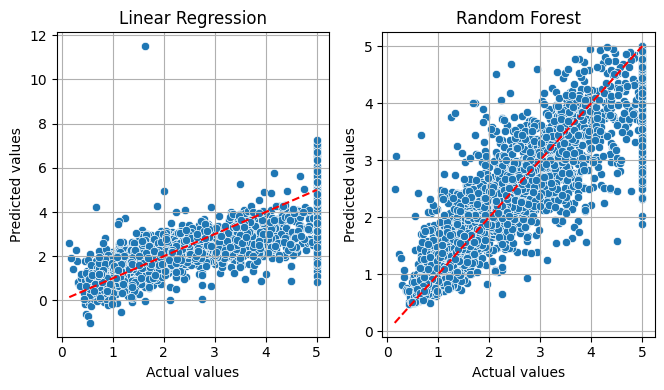

In [13]:
# Візуалізація результатів
plt.figure(figsize=(10, 4))

# Scatter plot для Лінійної регресії
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=best_models['Linear Regression'].predict(X_test))
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regression')
plt.grid(True)

# Scatter plot для Random Forest
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=best_models['Random Forest Regressor'].predict(X_test))
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Random Forest')
plt.grid(True)

# Відображення графіків
plt.tight_layout()
plt.show()

In [14]:


# 6. виводимо справжні та прогнозовані значення
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    comparison_df = pd.DataFrame({
        'Actual Values': y_test,
        'Predicted Values': y_pred
    })

    print(f"\nСправжні і прогнозовані значення для {name}:")
    print(comparison_df.head())  # Виводимо перші кілька рядків таблиці



Справжні і прогнозовані значення для Linear Regression:
       Actual Values  Predicted Values
20046        0.47700          0.719123
3024         0.45800          1.764017
15663        5.00001          2.709659
20484        2.18600          2.838926
9814         2.78000          2.604657

Справжні і прогнозовані значення для Ridge Regression:
       Actual Values  Predicted Values
20046        0.47700          0.719158
3024         0.45800          1.763999
15663        5.00001          2.709621
20484        2.18600          2.838910
9814         2.78000          2.604610

Справжні і прогнозовані значення для Random Forest Regressor:
       Actual Values  Predicted Values
20046        0.47700          0.495495
3024         0.45800          0.733734
15663        5.00001          4.828326
20484        2.18600          2.642410
9814         2.78000          2.285808
